In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the csv data
df = pd.read_csv('load_data.csv')
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


# EDA

In [4]:
# to display stats about data
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,33482.000000,34165.000000,33885.000000,34586.000000,34691.000000,33570.000000,34586.000000
mean,30.873061,14.704573,4.386097,0.012947,90.740871,94.926552,48013.664032
std,41.415015,20.342721,9.090181,0.019726,39.745395,49.826872,34046.492333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.310000,2.340000,0.000000,0.000000,66.295000,99.800000,22500.000000
50%,5.290000,5.180000,0.000000,0.000000,90.080000,100.000000,45000.000000
75%,53.560000,23.510000,2.298558,0.020000,100.000000,100.000000,68400.000000
max,435.019069,262.630718,78.809000,0.188166,299.996814,299.969494,248821.810465


In [5]:
# to get basic info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             33482 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64
 4   CO2(tCO2)                             34586 non-null  float64
 5   Lagging_Current_Power_Factor          34691 non-null  float64
 6   Leading_Current_Power_Factor          33570 non-null  float64
 7   NSM                                   34586 non-null  float64
 8   Load_Type                             35041 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


In [6]:
# to display no. of samples in each class
df['Load_Type'].value_counts()


Load_Type
Light_Load      18073
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

# Data cleaning and Preprocessing the Dataset

In [7]:
# check for null values
df.isnull().sum()

Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

In [8]:


# if null values exist -> fill them with median (simple & safe)
for col in ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh',
            'Leading_Current_Reactive_Power_kVarh','CO2(tCO2)',
            'Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']:
    df[col].fillna(df[col].median(), inplace=True)

# recheck
df.isnull().sum()


Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Load_Type                               0
dtype: int64

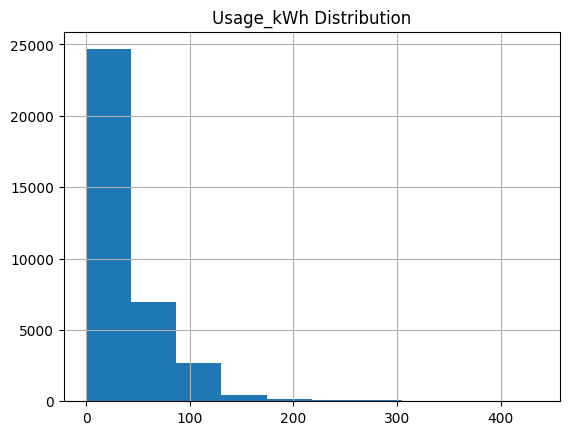

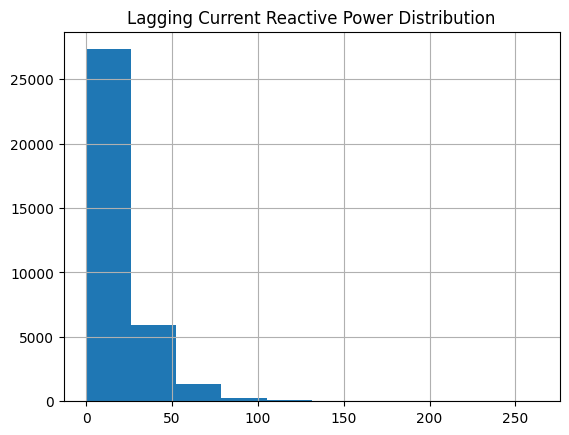

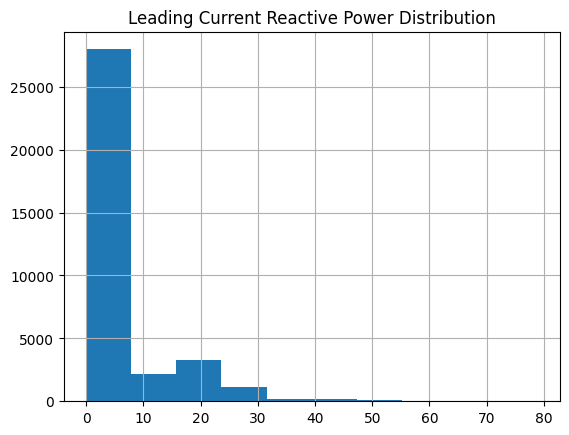

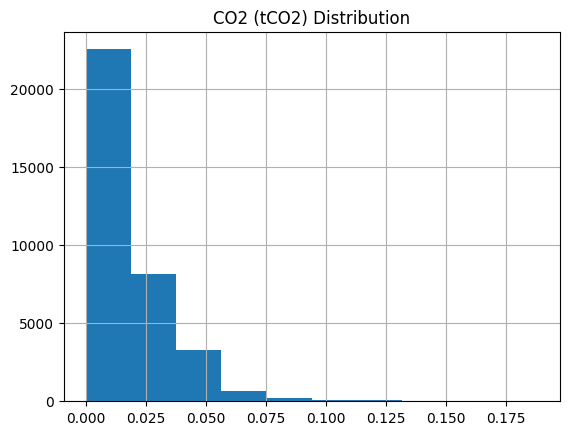

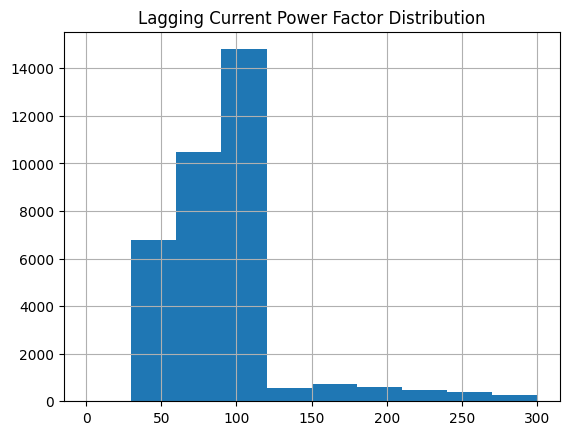

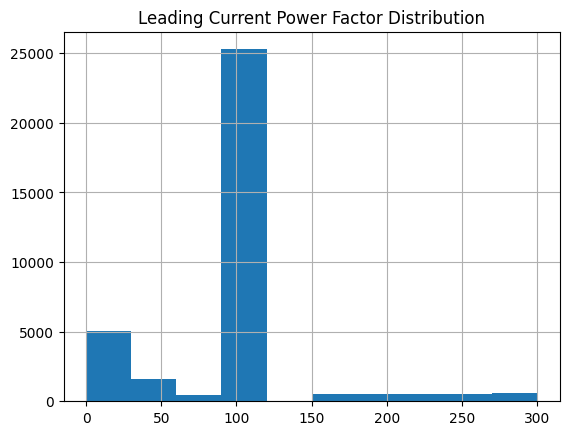

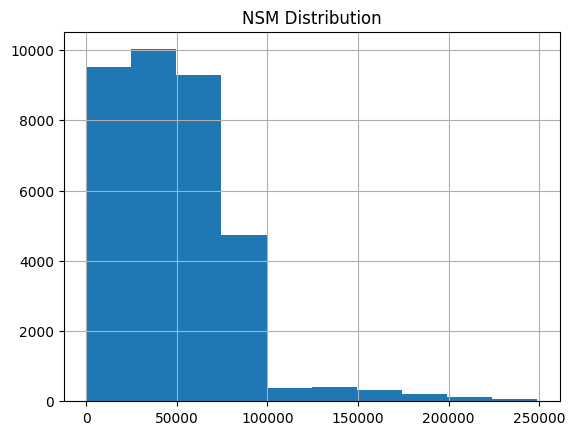

In [14]:
# histograms for your dataset

df['Usage_kWh'].hist()
plt.title("Usage_kWh Distribution")
plt.show()

df['Lagging_Current_Reactive.Power_kVarh'].hist()
plt.title("Lagging Current Reactive Power Distribution")
plt.show()

df['Leading_Current_Reactive_Power_kVarh'].hist()
plt.title("Leading Current Reactive Power Distribution")
plt.show()

df['CO2(tCO2)'].hist()
plt.title("CO2 (tCO2) Distribution")
plt.show()

df['Lagging_Current_Power_Factor'].hist()
plt.title("Lagging Current Power Factor Distribution")
plt.show()

df['Leading_Current_Power_Factor'].hist()
plt.title("Leading Current Power Factor Distribution")
plt.show()

df['NSM'].hist()
plt.title("NSM Distribution")
plt.show()



 # Exploratory Data Analysis

In [ ]:
#find some patterns and relations within the data

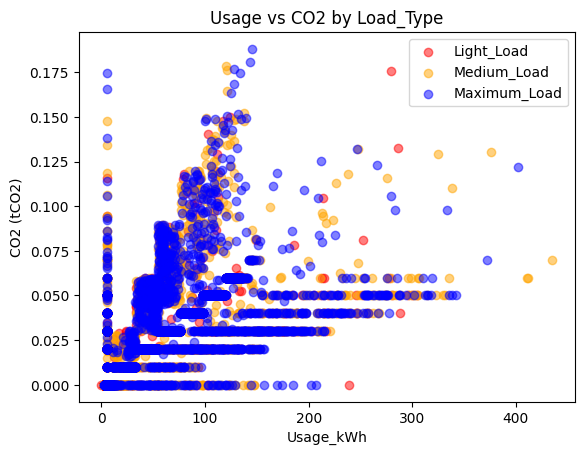

In [15]:
# Scatter plot: Usage vs CO2 for each Load_Type
colors = ['red', 'orange', 'blue']
classes = ['Light_Load', 'Medium_Load', 'Maximum_Load']

for i in range(3):
    x = df[df['Load_Type'] == classes[i]]
    plt.scatter(x['Usage_kWh'], x['CO2(tCO2)'], c=colors[i], label=classes[i], alpha=0.5)

plt.xlabel("Usage_kWh")
plt.ylabel("CO2 (tCO2)")
plt.legend()
plt.title("Usage vs CO2 by Load_Type")
plt.show()


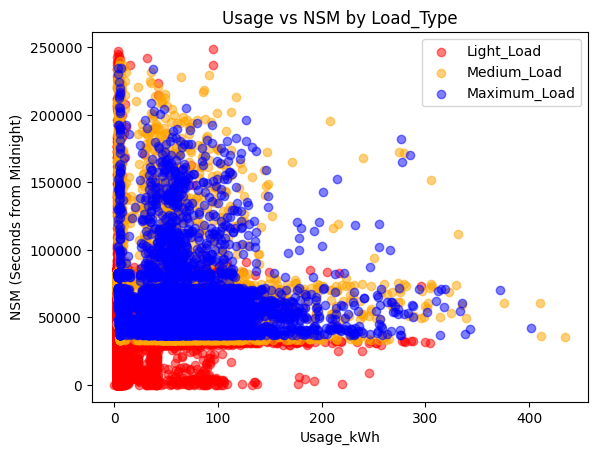

In [12]:
# Scatter plot: Usage vs NSM for each Load_Type
for i in range(3):
    x = df[df['Load_Type'] == classes[i]]
    plt.scatter(x['Usage_kWh'], x['NSM'], c=colors[i], label=classes[i], alpha=0.5)

plt.xlabel("Usage_kWh")
plt.ylabel("NSM (Seconds from Midnight)")
plt.legend()
plt.title("Usage vs NSM by Load_Type")
plt.show()


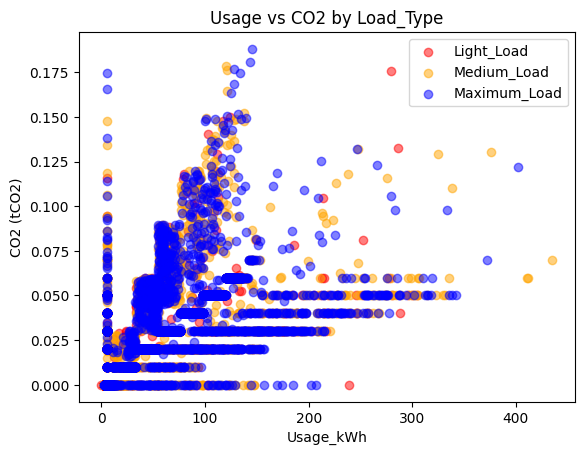

In [11]:
# Scatter plot: Usage vs CO2 for each Load_Type
colors = ['red', 'orange', 'blue']
classes = ['Light_Load', 'Medium_Load', 'Maximum_Load']

for i in range(3):
    x = df[df['Load_Type'] == classes[i]]
    plt.scatter(x['Usage_kWh'], x['CO2(tCO2)'], c=colors[i], label=classes[i], alpha=0.5)

plt.xlabel("Usage_kWh")
plt.ylabel("CO2 (tCO2)")
plt.legend()
plt.title("Usage vs CO2 by Load_Type")
plt.show()


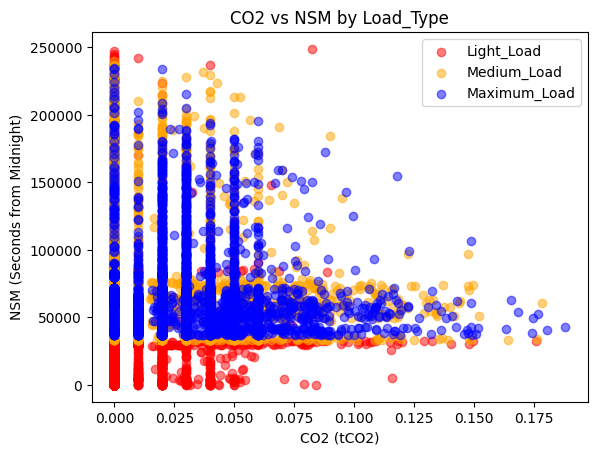

In [13]:
# Scatter plot: CO2 vs NSM for each Load_Type
for i in range(3):
    x = df[df['Load_Type'] == classes[i]]
    plt.scatter(x['CO2(tCO2)'], x['NSM'], c=colors[i], label=classes[i], alpha=0.5)

plt.xlabel("CO2 (tCO2)")
plt.ylabel("NSM (Seconds from Midnight)")
plt.legend()
plt.title("CO2 vs NSM by Load_Type")
plt.show()


# Correlation Matrix


In [16]:
# display the correlation matrix
corr = df[['Usage_kWh',
           'Lagging_Current_Reactive.Power_kVarh',
           'Leading_Current_Reactive_Power_kVarh',
           'CO2(tCO2)',
           'Lagging_Current_Power_Factor',
           'Leading_Current_Power_Factor',
           'NSM']].corr()

corr


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.703078,-0.260042,0.797093,0.177632,0.208614,0.168743
Lagging_Current_Reactive.Power_kVarh,0.703078,1.000000,-0.327101,0.719122,0.063214,0.245957,0.063993
Leading_Current_Reactive_Power_kVarh,-0.260042,-0.327101,1.000000,-0.275237,0.255600,-0.577129,0.271222
CO2(tCO2),0.797093,0.719122,-0.275237,1.000000,0.180487,0.221993,0.174235
Lagging_Current_Power_Factor,0.177632,0.063214,0.255600,0.180487,1.000000,-0.189302,0.246328
Leading_Current_Power_Factor,0.208614,0.245957,-0.577129,0.221993,-0.189302,1.000000,-0.194489
NSM,0.168743,0.063993,0.271222,0.174235,0.246328,-0.194489,1.000000


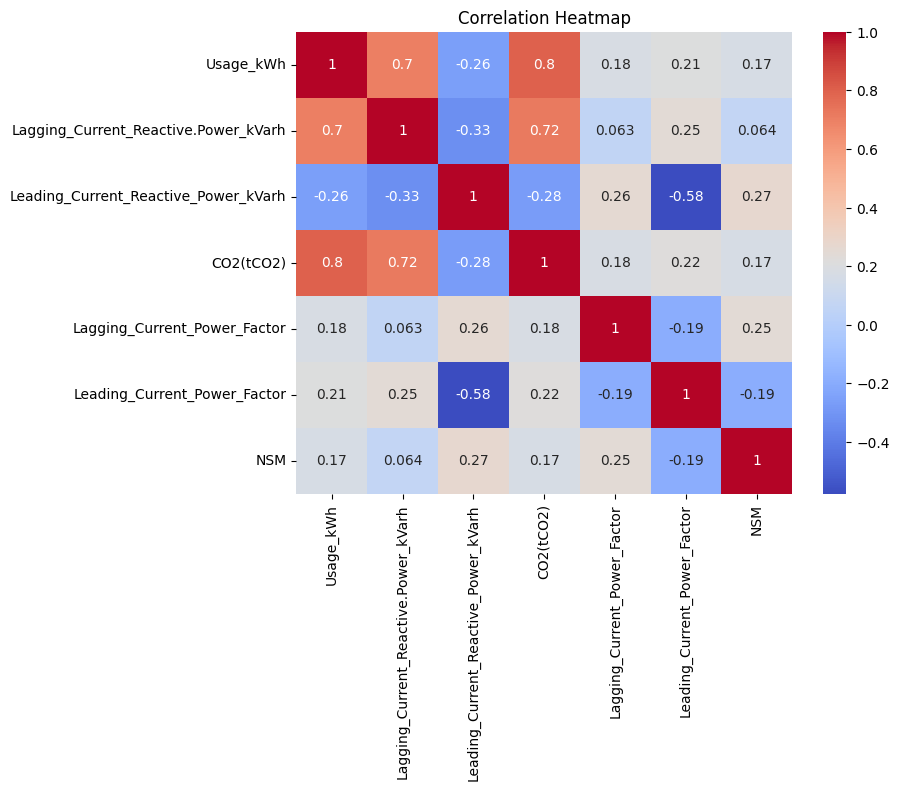

In [17]:
# plot the heat map
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
### Observations from Correlation Heatmap
#usage_kWh shows [your strongest correlation result here].
#cO2(tCO2) is correlated with Usage_kWh → higher consumption leads to higher CO2.
#NSM has [weak/strong] relation with usage (time-of-day effect).
# Power factors have [positive/negative] correlations with reactive power.

# Label Encoding

In [21]:
# head before encoding
df[['Date_Time','Usage_kWh','CO2(tCO2)','Load_Type']].head()


,Date_Time,Usage_kWh,CO2(tCO2),Load_Type
0,01-01-2018 00:15,8.753692,0.0,0
1,01-01-2018 00:30,4.000000,0.0,0
2,01-01-2018 00:45,3.240000,0.0,0
3,01-01-2018 01:00,3.310000,0.0,0
4,01-01-2018 01:15,3.820000,0.0,0


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# transform the string labels (Light_Load, Medium_Load, Maximum_Load) to integers
df['Load_Type'] = le.fit_transform(df['Load_Type'])

df.head()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,0
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,0
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,0
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,0
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,100.0,4500.000000,0


# Model Training and Testing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [26]:
# Convert Date_Time with correct format
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True)

# Extract numeric features
df['Hour'] = df['Date_Time'].dt.hour
df['Day'] = df['Date_Time'].dt.day
df['Month'] = df['Date_Time'].dt.month

# Input and output
X = df.drop(columns=['Load_Type', 'Date_Time'])
Y = df['Load_Type']

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

# Accuracy
accuracy = model.score(x_test, y_test) * 100
print("Accuracy: ", accuracy)

# Sample predictions
y_pred = model.predict(x_test)
print("Predictions:", y_pred[:10])



Accuracy:  66.6222771806335
Predictions: [0 1 1 0 2 0 2 0 2 0]


In [27]:
# --- Logistic Regression ---
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)  # train the model
print("Accuracy (Logistic Regression):", model.score(x_test, y_test) * 100)

# --- K-Nearest Neighbours ---
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)  # train the model
print("Accuracy (KNN):", model.score(x_test, y_test) * 100)

# --- Decision Tree ---
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)  # train the model
print("Accuracy (Decision Tree):", model.score(x_test, y_test) * 100)


Accuracy (Logistic Regression): 66.6222771806335
Accuracy (KNN): 83.34443070484163
Accuracy (Decision Tree): 96.75639684200513
